In [1]:
import os
import math
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

import stylia as st
from stylia import TWO_COLUMNS_WIDTH

In [2]:
#import colors from stylia
import random
cmap = ['#5F4690','#1D6996','#38A6A5', '#0F8554','#73AF48','#EDAD08','#E17C05','#CC503E','#94346E']
random.shuffle(cmap)
#cmap_1 = cmap[:4]
#cmap_2 = cmap[-6:]

#Fix the color map from a good random combination for reproducibility
cmap_1 = ['#E17C05', '#5F4690', '#CC503E', '#1D6996', '#0F8554']
cmap_2 = ['#73AF48', '#EDAD08', '#38A6A5',  '#94346E']

In [3]:
assay_name={"nf54": "Pf NF54", "mtb": "Mtb H37Rv"}

### Import functions

In [4]:
import sys 
sys.path.append("../src")

from series_split import PCA_UMAP_preprocess, cross_val_data
from pca_umap import PCA_plot, UMAP_plot, training_points, auroc_improvement

# Plot Individual Figures

In [9]:
disease = "nf54"

In [10]:
# Load Data
if disease == "nf54":
    PATH = "../data/dotmatics/series_splits/pf"
    PREDS_PATH = "../data/predictions/zairachem/series_splits/pf"
    GLOBAL_PATH = os.path.join(PATH, "plasmodium_NF54")
    SERIES_PATHS = {
        "PPI29" : os.path.join(PATH, "PPI29", "PPI29_all"),
        "SFI06" : os.path.join(PATH, "SFI06", "SFI06_all"),
        "SFK40" : os.path.join(PATH, "SFK40", "SFK40_all"),
        "SFK52" : os.path.join(PATH, "SFK52", "SFK52_all"),
        "SFK53" : os.path.join(PATH, "SFK53", "SFK53_all"),
    }

    SERIES = SERIES_PATHS.keys()
    TRAINING_POINTS = ["0", "10", "30", "60", "100"]
    folds = 5
    cutoff = 0.1
    cmap = cmap_1
if disease == "mtb":
    PATH = "../data/dotmatics/series_splits/mtb"
    PREDS_PATH = "../data/predictions/zairachem/series_splits/mtb"
    GLOBAL_PATH = GLOBAL_PATH = os.path.join(PATH, "H3D_mtb_H37Rv_7H9_ADC_GLU_TW")
    SERIES_PATHS = {
        "Indolecarboxamides" : os.path.join(PATH, "Indolecarboxamides", "Indolecarboxamides_all"),
        "Quinolines" : os.path.join(PATH, "Quinolines", "Quinolines_all"),
        "SFK41" : os.path.join(PATH, "SFK41", "SFK41_all"),
        "Spiropyrimidinetriones" : os.path.join(PATH, "Spiropyrimidinetriones", "Spiropyrimidinetriones_all"),
    }

    SERIES = ["Indolecarboxamides", "Quinolines", "SFK41", "Spiropyrimidinetriones"]
    TRAINING_POINTS = ["0", "10", "30", "60", "100"]
    folds = 5
    cutoff = 5.0
    cmap = cmap_2

In [11]:
chem_space = PCA_UMAP_preprocess(GLOBAL_PATH, SERIES_PATHS)

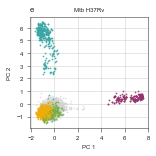

In [22]:
fig, axs = st.create_figure(1,1, width=TWO_COLUMNS_WIDTH/3.33, height=TWO_COLUMNS_WIDTH/3.33)
ax = axs[0]
PCA_plot(ax, chem_space, cmap, disease)
if disease == "nf54":
    abc = "a"
else:
    abc = "e"
st.label(ax=ax, ylabel="PC 2", xlabel="PC 1", title=assay_name[disease], abc=abc)
plt.tight_layout()
plt.savefig("../figures/paper_figures/figure3/pca_{}.pdf".format(disease))

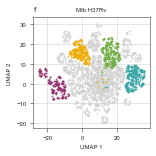

In [23]:
fig, axs = st.create_figure(1,1, width=TWO_COLUMNS_WIDTH/3.33, height=TWO_COLUMNS_WIDTH/3.33)
ax = axs[0]
UMAP_plot(ax, chem_space, cmap, disease)
if disease == "nf54":
    abc = "b"
else:
    abc = "f"
st.label(ax=ax, ylabel="UMAP 2", xlabel="UMAP 1", title=assay_name[disease], abc=abc)
plt.tight_layout()
plt.savefig("../figures/paper_figures/figure3/umap_{}.pdf".format(disease))

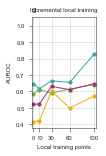

In [20]:
fig, axs = st.create_figure(1,1, width=TWO_COLUMNS_WIDTH/5, height=TWO_COLUMNS_WIDTH/3.33)
ax = axs[0]
all_scores, scores_avg_dict, std_devs_dict = cross_val_data(SERIES, folds, cutoff, TRAINING_POINTS, PATH, PREDS_PATH)
training_points(ax, scores_avg_dict, cmap,  TRAINING_POINTS, SERIES)
if disease == "nf54":
    abc = "c"
else:
    abc = "g"
st.label(ax, title="Incremental local training", xlabel="Local training points", ylabel="AUROC", abc=abc)
plt.tight_layout()
plt.savefig("../figures/paper_figures/figure3/local_{}.pdf".format(disease))

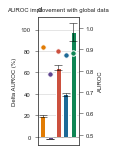

In [12]:
fig, axs = st.create_figure(1,1, width=TWO_COLUMNS_WIDTH/5, height=TWO_COLUMNS_WIDTH/3.33)
ax = axs[0]
all_scores, scores_avg_dict, std_devs_dict = cross_val_data(SERIES, folds, cutoff, TRAINING_POINTS, PATH, PREDS_PATH)
auroc_improvement(ax, scores_avg_dict, std_devs_dict, cmap, SERIES, folds)
if disease == "nf54":
    abc = "d"
else:
    abc = "h"
st.label(ax, title="AUROC improvement with global data", xlabel="", ylabel="Delta AUROC (%)", abc=abc)
plt.tight_layout()
plt.savefig("../figures/paper_figures/figure3/global_{}.pdf".format(disease))

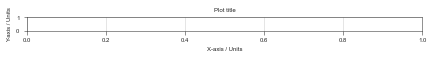

In [30]:
#placeholder for the legends
fig, axs = st.create_figure(1,1, width=TWO_COLUMNS_WIDTH, height=0.25)
ax = axs[0]
plt.savefig("../figures/paper_figures/figure3/legend_placeholder.pdf")